## Import Necessary Packages

In [1]:
import glob
import numpy as np
import xarray as xr
import proplot as pplt
import warnings
warnings.filterwarnings('ignore')

## User-Defined Fields

In [2]:
path  = # '/directory/where/large/or/small/domain/files/are/located/'
exp   = 'rcemip-large' # or 'rcemip-small_v2'
cases = ['nz_32','nz_64','nz_128'] # or ['nz_32','nz_64','nz_128','nz_256']
start = 0  # Calculate fields starting from this day
end   = 30 # Calculate fields ending with this day

## Plot Fig. 11

Calculate the virtual temperature for the lowest model level following $T_v = T \frac{1 + rv}{\epsilon(1 + rv)}$. Then at each time step, calculate the distribution of virtual temperature anomalies ${T_v}'$, where anomalies are deviations from the horizontal domain-mean. Plot the distribution of ${T_v}'$ by case.

In [3]:
epsilon = 0.622
bins = np.linspace(-5,0,num=50)
bincenter = bins[:-1]+np.diff(bins)[0]/2

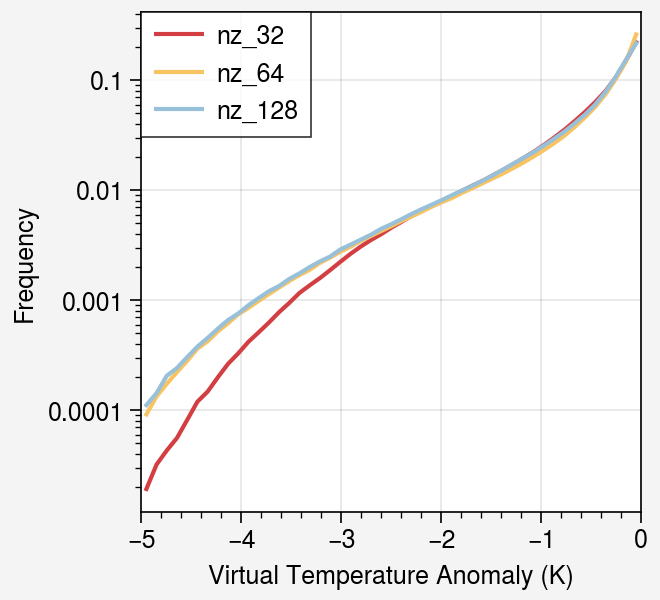

In [4]:
cmap   = np.asarray([[211,62,67,255],[248,196,98,255],[152,193,217,255],[64,72,119,255]])/255
fig,ax = pplt.subplots()
ax.format(ylabel='Frequency',yscale='log',xlabel='Virtual temperature anomaly (K)',xlim=(-5,0))
for i,case in enumerate(cases):
    # List files
    tfiles = np.sort(glob.glob(path+case+'/OUT_3D/TABS/*.nc'))
    qvfiles = np.sort(glob.glob(path+case+'/OUT_3D/QV/*.nc'))
    # Calculate virtual temperature anomalies
    t  = xr.open_mfdataset(tfiles).isel(z=0).TABS.sel(time=slice(start,end))
    rv = xr.open_mfdataset(qvfiles).isel(z=0).QV.sel(time=slice(start,end))/1000 # from g/kg to kg/kg
    tv = (t*(1+(rv/epsilon))/(1+rv)).load()
    tvanom = tv - tv.mean(dim=('x','y'))
    del t,rv,tv
    # Calculate and plot anomaly distribution
    tvhist,_ = np.histogram(np.ravel(tvanom.values),bins) 
    ax.plot(bincenter,tvhist/sum(tvhist),color=cmap[i],label=case)
ax.legend(ncols=1)